In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [6]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [7]:
(path/"images").ls()

(#7393) [Path('images/Birman_115.jpg'),Path('images/leonberger_142.jpg'),Path('images/Bombay_68.jpg'),Path('images/japanese_chin_26.jpg'),Path('images/saint_bernard_149.jpg'),Path('images/Ragdoll_41.jpg'),Path('images/japanese_chin_32.jpg'),Path('images/Ragdoll_68.jpg'),Path('images/Persian_202.jpg'),Path('images/scottish_terrier_143.jpg')...]

<Axes: >

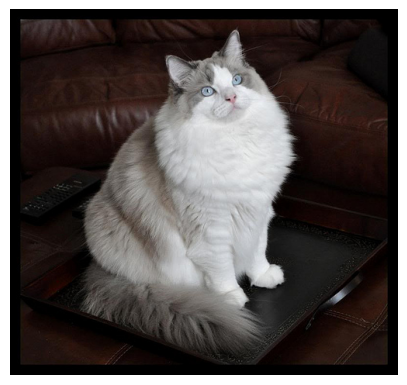

In [14]:
fname = (path/"images").ls()[5]
show_image(load_image(fname))

In [15]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Ragdoll']

In [19]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms= aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders((path/"images"))

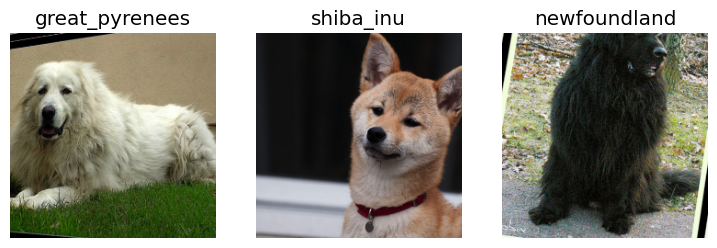

In [23]:
dls.show_batch(nrows=1, ncols=3)

In [24]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying partial gives
      newfoundland
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(27)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(27))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up af

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 60.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.500016,0.330424,0.107578,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.524508,0.265109,0.092693,00:46
1,0.315618,0.212276,0.067659,00:45


In [26]:
x,y = dls.one_batch()

In [27]:
y

TensorCategory([29, 13,  3,  4, 16,  5, 29, 22, 15, 28, 16, 30, 33, 22, 11, 26, 13, 13,  7, 25,  8, 32,  2, 36, 29, 18, 11, 32,  2, 11, 18, 18, 17,  0,  6, 24,  8, 22,  9, 14, 11,  7,  0, 14,  6,  6,
                26, 12, 15, 13, 10, 25, 33, 16, 11, 19, 34, 10, 20, 21,  8,  5, 24,  0], device='cuda:0')

In [29]:
preds, _ = learn.get_preds(dl=[(x, y)])
print(preds[0])
print(len(preds[0]), preds[0].sum())

tensor([1.1000e-05, 2.5085e-04, 1.7398e-05, 8.7815e-05, 1.5771e-04, 5.5654e-05, 3.4521e-06, 7.3207e-06, 1.9935e-05, 1.1603e-05, 2.9903e-04, 1.1919e-04, 1.7039e-02, 2.3090e-05, 2.4926e-06, 1.7757e-05,
        1.1514e-03, 1.1582e-05, 3.7015e-07, 9.9012e-07, 2.1524e-05, 1.2050e-05, 1.3817e-05, 1.6187e-05, 2.9893e-05, 1.0177e-05, 9.2338e-07, 4.2514e-06, 2.9832e-06, 9.7748e-01, 1.8831e-04, 1.2331e-05,
        4.8998e-05, 3.5670e-04, 2.4165e-03, 7.3595e-05, 2.0470e-05])
37 tensor(1.0000)


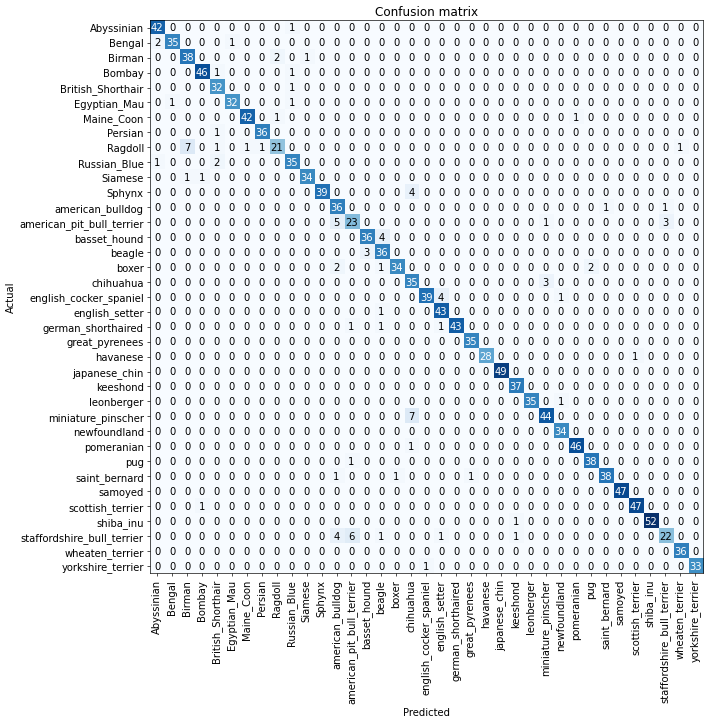

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [39]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 7),
 ('miniature_pinscher', 'chihuahua', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


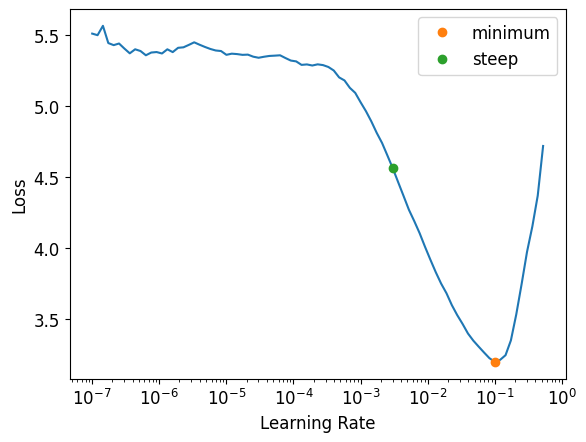

In [42]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [43]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.02e-03


In [55]:
learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(2, base_lr=3e-3)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.286453,0.365676,0.121786,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.535388,0.411201,0.115697,00:32
1,0.319950,0.222481,0.074425,00:32


In [47]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

# fit_one_cycle is more manual than fine_tune, as fine_tune auto unfreezes etc...
learn.fit_one_cycle(3, 3e-3)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.141677,0.317825,0.100135,00:36
1,0.542998,0.219328,0.069012,00:36
2,0.322571,0.191552,0.062246,00:37


In [50]:
learn.unfreeze()

SuggestedLRs(valley=1.4454397387453355e-05)

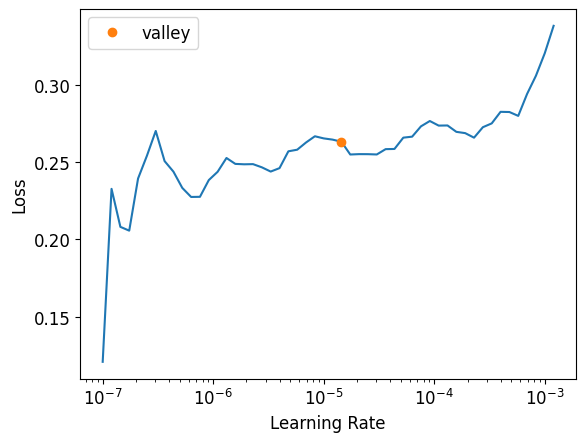

In [51]:
learn.lr_find()

In [53]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.266097,0.191890,0.058863,00:45
1,0.258231,0.180898,0.060893,00:45
2,0.222121,0.178991,0.051421,00:46
3,0.216618,0.176714,0.052774,00:46
4,0.183062,0.175207,0.056834,00:46
5,0.181922,0.174345,0.054804,00:46


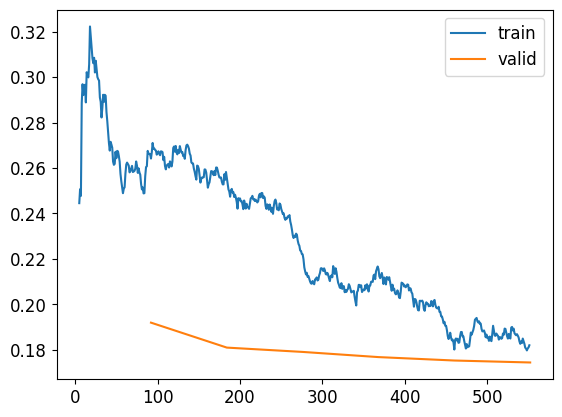

In [54]:
learn.recorder.plot_loss()